In [5]:
import numpy as np
from scipy.stats import triang, lognorm, pareto
import matplotlib.pyplot as plt

In [6]:
# Task 1 - Function to calculate probability for triangular distribution
def calculate_probability_av(a, b, c, point1):
    dist = triang(c=(c - a) / (b - a), loc=a, scale=b - a)
    prob1 = dist.cdf(point1)
    return prob1

In [7]:
# Task 2 - Function to calculate mean and median for triangular distribution
def calculate_mean_median_av(a, b, c):
    dist = triang(c=(c - a) / (b - a), loc=a, scale=b - a)
    MEAN_t = dist.mean()
    MEDIAN_t = dist.median()
    return MEAN_t, MEDIAN_t

In [8]:
# Task 3 - Function to calculate mean and variance for numbers of annual occurrences
def calculate_mean_variance_occurrences(number_set, prob_set):
    MEAN_d = np.sum(np.array(number_set) * np.array(prob_set))
    VARIANCE_d = np.sum(np.array(number_set) ** 2 * np.array(prob_set)) - MEAN_d ** 2
    return MEAN_d, VARIANCE_d

In [9]:
def monte_carlo_simulation(mu, sigma, xm, alpha, num, point2, point3, point4):
    impact_A = lognorm(sigma, scale=np.exp(mu))
    impact_B = pareto(alpha, scale=xm)
    
    total_impact_samples = impact_A.rvs(num) + impact_B.rvs(num)
    
    prob2 = np.sum(total_impact_samples > point2) / num
    prob3 = np.sum((point3 < total_impact_samples) & (total_impact_samples < point4)) / num
    
    return prob2, prob3

In [10]:
def monte_carlo_simulation(mu, sigma, xm, alpha, num, point2, point3, point4):
    impact_A = lognorm(sigma, scale=np.exp(mu))
    impact_B = pareto(alpha, scale=xm)
    
    total_impact_samples = impact_A.rvs(num) + impact_B.rvs(num)
    
    prob2 = np.sum(total_impact_samples > point2) / num
    prob3 = np.sum((point3 < total_impact_samples) & (total_impact_samples < point4)) / num
    
    return prob2, prob3

In [11]:
def calculate_ALE(MEAN_t, MEAN_d, prob2):
    EF = prob2
    SLE = MEAN_t * EF
    ARO = MEAN_d
    ALE = ARO * SLE
    return ALE

In [12]:
# Example usage:
a, b, c = 10, 50, 30
point1 = 20

In [13]:
number_set = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
prob_set = [0.1, 0.2, 0.15, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05]

In [14]:
num = 10000
point2 = 100

In [15]:
mu, sigma = 0.5, 0.1
xm, alpha = 50, 2
point3, point4 = 150, 200

In [16]:
def Task1(a, b, c, point1, number_set, prob_set, num, point2, mu, sigma, xm, alpha, point3, point4):
    prob1 = calculate_probability_av(a, b, c, point1)
    MEAN_t, MEDIAN_t = calculate_mean_median_av(a, b, c)
    MEAN_d, VARIANCE_d = calculate_mean_variance_occurrences(number_set, prob_set)
    prob2, prob3 = monte_carlo_simulation(mu, sigma, xm, alpha, num, point2, point3, point4)
    ALE = calculate_ALE(MEAN_t, MEAN_d, prob2)
    
    # Visualize the distributions
    plt.figure(figsize=(15, 5))
    
    # Distribution of AV
    av_values = triang(c=(c - a) / (b - a), loc=a, scale=b - a).rvs(10000)
    plt.subplot(231)
    plt.hist(av_values, bins=50, color='skyblue', edgecolor='black')
    plt.title('Asset Value Distribution')
    plt.xlabel('Asset Value')
    plt.ylabel('Frequency')
    
    # Distribution of Total Impact
    total_impact_samples = lognorm(sigma, scale=np.exp(mu)).rvs(10000) + pareto(alpha, scale=xm).rvs(10000)
    plt.subplot(232)
    plt.hist(total_impact_samples, bins=50, color='lightcoral', edgecolor='black')
    plt.title('Total Impact Distribution')
    plt.xlabel('Total Impact')
    plt.ylabel('Frequency')
    
    # Distribution of Number of Occurrences
    occurrences_values = np.random.choice(number_set, size=10000, p=prob_set)
    plt.subplot(233)
    plt.hist(occurrences_values, bins=np.arange(-0.5, max(number_set) + 1.5, 1), color='lightgreen', edgecolor='black')
    plt.title('Number of Occurrences Distribution')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Frequency')
    
    # ALE Calculation
    plt.subplot(234)
    plt.bar(['SLE', 'ARO', 'EF', 'ALE'], [MEAN_t, MEAN_d, prob2, ALE], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title('ALE Components')
    plt.ylabel('Value')
    
    # Monte Carlo Results
    plt.subplot(235)
    plt.bar(['Prob2', 'Prob3'], [prob2, prob3], color=['lightcoral', 'lightgreen'])
    plt.title('Monte Carlo Results')
    plt.ylabel('Probability')
    
    plt.tight_layout()
    plt.show()

    return prob1, MEAN_t, MEDIAN_t, MEAN_d, VARIANCE_d, prob2, prob3, ALE

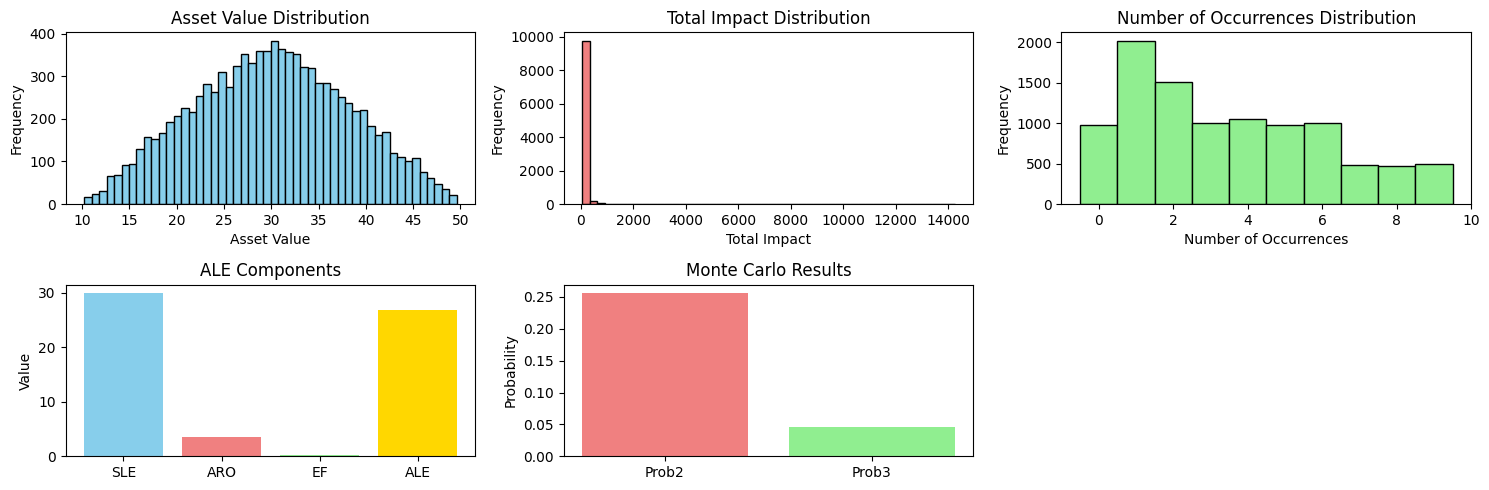

In [17]:
# Execute Task 1
result = Task1(a, b, c, point1, number_set, prob_set, num, point2, mu, sigma, xm, alpha, point3, point4)

In [18]:
result

(0.125,
 30.0,
 30.0,
 3.5000000000000004,
 6.849999999999998,
 0.2564,
 0.0466,
 26.922000000000004)